In [28]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# function to load CSV file (the metrics)
def load_data(file_path):
    return pd.read_csv(file_path)


In [29]:
# loading all metrics
import os

metrics_folder = '../metrics'

circom_df = load_data(os.path.join(metrics_folder, 'metrics_for_circom.csv'))
zokrates_df = load_data(os.path.join(metrics_folder, 'metrics_for_zokrates.csv'))
risc0_df = load_data(os.path.join(metrics_folder, 'metrics_for_risc0.csv'))
sp1_zkvm_df = load_data(os.path.join(metrics_folder, 'metrics_for_sp1.csv'))
nexus_df = load_data(os.path.join(metrics_folder, 'metrics_for_nexus.csv'))
cairo_df = load_data(os.path.join(metrics_folder, 'metrics_for_cairo.csv'))
snarkvm_df = load_data(os.path.join(metrics_folder, 'metrics_for_snarkvm.csv'))


In [30]:
# preparing list of DataFrames and titles
data_frames = [circom_df, zokrates_df, risc0_df, sp1_zkvm_df, nexus_df, cairo_df, snarkvm_df]
titles = ['Circom', 'ZoKrates', 'RISC Zero', 'SP1', 'Nexus VM', 'Cairo', "snarkVM"]


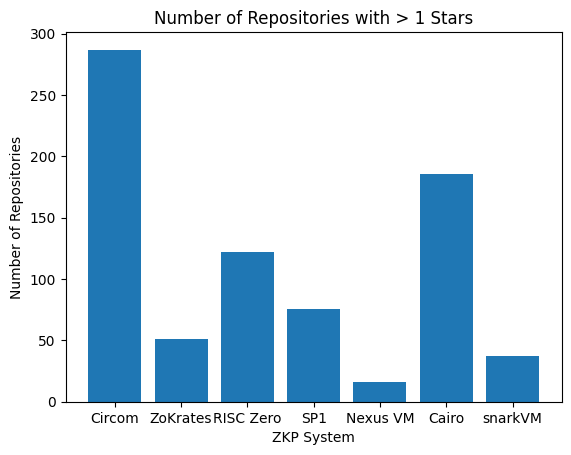

In [31]:
# number of repositories with > 1 stars
stars_count = [len(df[df['Stars'] > 1]) for df in data_frames]
plt.bar(titles, stars_count)
plt.title('Number of Repositories with > 1 Stars')
plt.ylabel('Number of Repositories')
plt.xlabel('ZKP System')
plt.show()


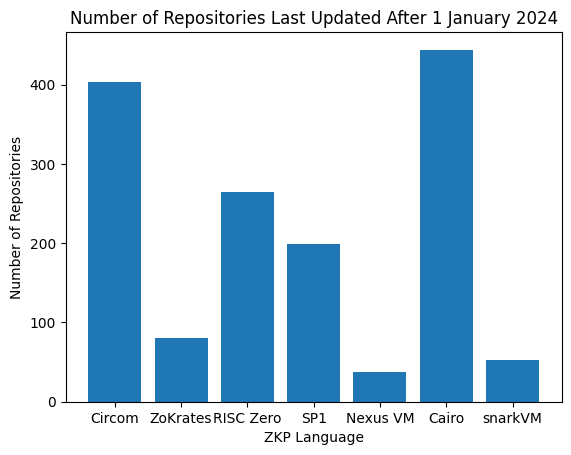

In [32]:
# number of repositories with last update time after 1 January 2024
update_count = [len(df[pd.to_datetime(df['Last Updated']) > pd.Timestamp('2024-01-01')]) for df in data_frames]
plt.bar(titles, update_count)
plt.title('Number of Repositories Last Updated After 1 January 2024')
plt.ylabel('Number of Repositories')
plt.xlabel('ZKP Language')
plt.show()


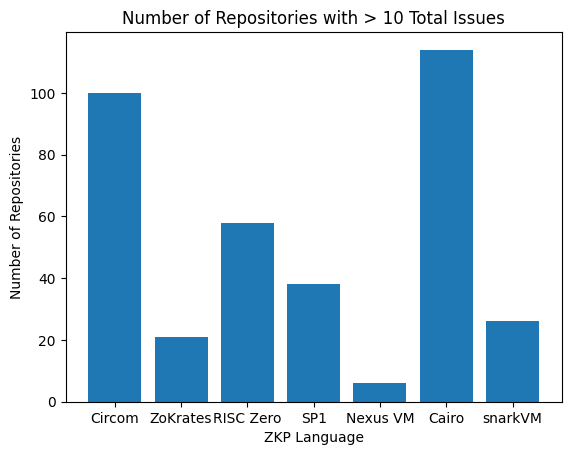

In [33]:
# number of repositories with > 10 total issues
issues_count = [len(df[df['Total Issues'] > 10]) for df in data_frames]
plt.bar(titles, issues_count)
plt.title('Number of Repositories with > 10 Total Issues')
plt.ylabel('Number of Repositories')
plt.xlabel('ZKP Language')
plt.show()


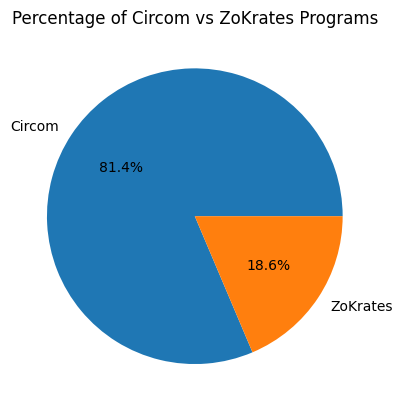

In [34]:
# percentage of Circom vs ZoKrates programs
circom_count = len(circom_df)
zokrates_count = len(zokrates_df)
total_circom_zokrates = circom_count + zokrates_count
percentages = [circom_count / total_circom_zokrates * 100, zokrates_count / total_circom_zokrates * 100]
plt.pie(percentages, labels=['Circom', 'ZoKrates'], autopct='%1.1f%%')
plt.title('Percentage of Circom vs ZoKrates Programs')
plt.show()


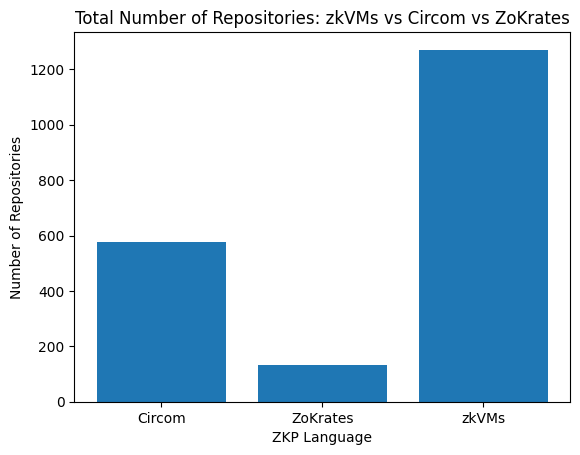

In [35]:
# total number of repositories: Circom vs ZoKrates vs zkVMs
zkvm_count = len(risc0_df) + len(sp1_zkvm_df) + len(nexus_df) + len(cairo_df) + len(snarkvm_df)
total_repositories = [circom_count, zokrates_count, zkvm_count]
plt.bar(['Circom', 'ZoKrates', 'zkVMs'], total_repositories)
plt.title('Total Number of Repositories: zkVMs vs Circom vs ZoKrates')
plt.ylabel('Number of Repositories')
plt.xlabel('ZKP Language')
plt.show()
